In [1]:
!pip install nltk

In [7]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\I6240624\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\I6240624\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [27]:
data=pd.read_csv(r"C:/Users/I6240624/Documents/BISS/Master Thesis/Code/DarianOthmanMasterThesis/Notebooks/Generic_t=1_P=1_Instagram_Dutch.csv", sep=";", header=None)

real_data = data[1]
synthetic_data = data[0]
#shared_data = data[data['Synthetic'] == 'Shared']

def preprocess_and_create_word_cloud(data, title):
    text = ' '.join(data.iloc[:])

    vectorizer = CountVectorizer(stop_words='english', token_pattern=r'\b[a-zA-Z]+\b', lowercase=True)
    counts = vectorizer.fit_transform([text])

    words = vectorizer.get_feature_names_out()

    lemmatizer = WordNetLemmatizer()

    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]

    wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(' '.join(lemmatized_words))
    plt.figure(figsize=(8, 8), facecolor=None)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(title)
    plt.show()


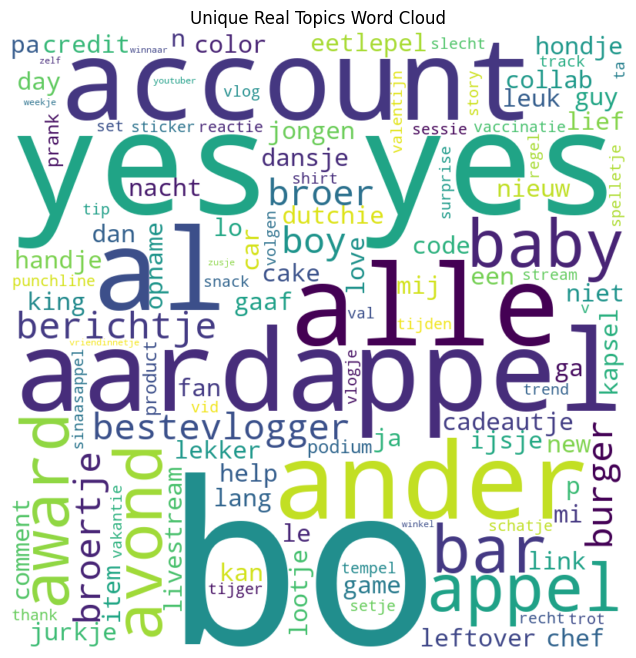

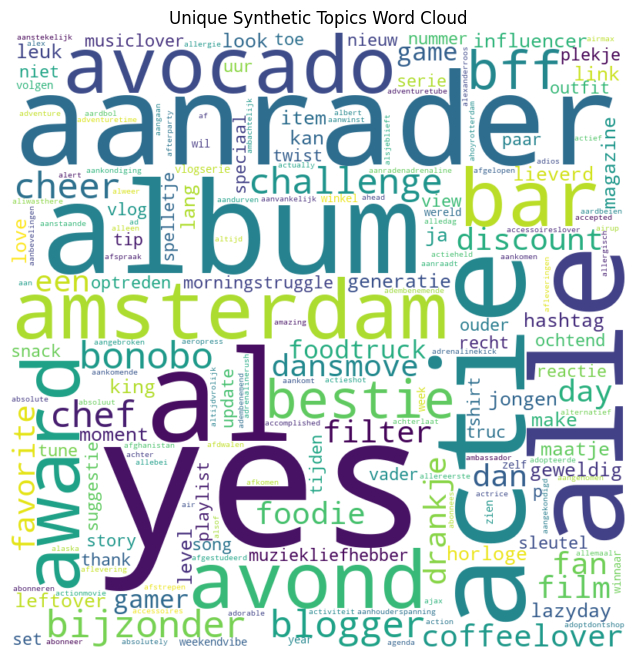

In [28]:
preprocess_and_create_word_cloud(real_data, "Unique Real Topics Word Cloud")
preprocess_and_create_word_cloud(synthetic_data, "Unique Synthetic Topics Word Cloud")
#preprocess_and_create_word_cloud(synthetic_data, "Shared Topics Word Cloud")